Verteilungsschätzung für Spalte Hour1:
Mittelwert: -0.04573531328789805
Standardabweichung: 0.28395835663664226
Geschätzte Verteilung: Normalverteilung mit Mittelwert -0.04573531328789805 und Standardabweichung 0.28395835663664226
Verteilungsschätzung für Spalte Hour2:
Mittelwert: -0.08074603978988991
Standardabweichung: 0.27485553873851254
Geschätzte Verteilung: Normalverteilung mit Mittelwert -0.08074603978988991 und Standardabweichung 0.27485553873851254
Verteilungsschätzung für Spalte Hour3:
Mittelwert: -0.07222503785197916
Standardabweichung: 0.27122839920933633
Geschätzte Verteilung: Normalverteilung mit Mittelwert -0.07222503785197916 und Standardabweichung 0.27122839920933633
Verteilungsschätzung für Spalte Hour4:
Mittelwert: -0.06393683323063315
Standardabweichung: 0.27048081238430377
Geschätzte Verteilung: Normalverteilung mit Mittelwert -0.06393683323063315 und Standardabweichung 0.27048081238430377
Verteilungsschätzung für Spalte Hour5:
Mittelwert: -0.05381570413742787
Stan

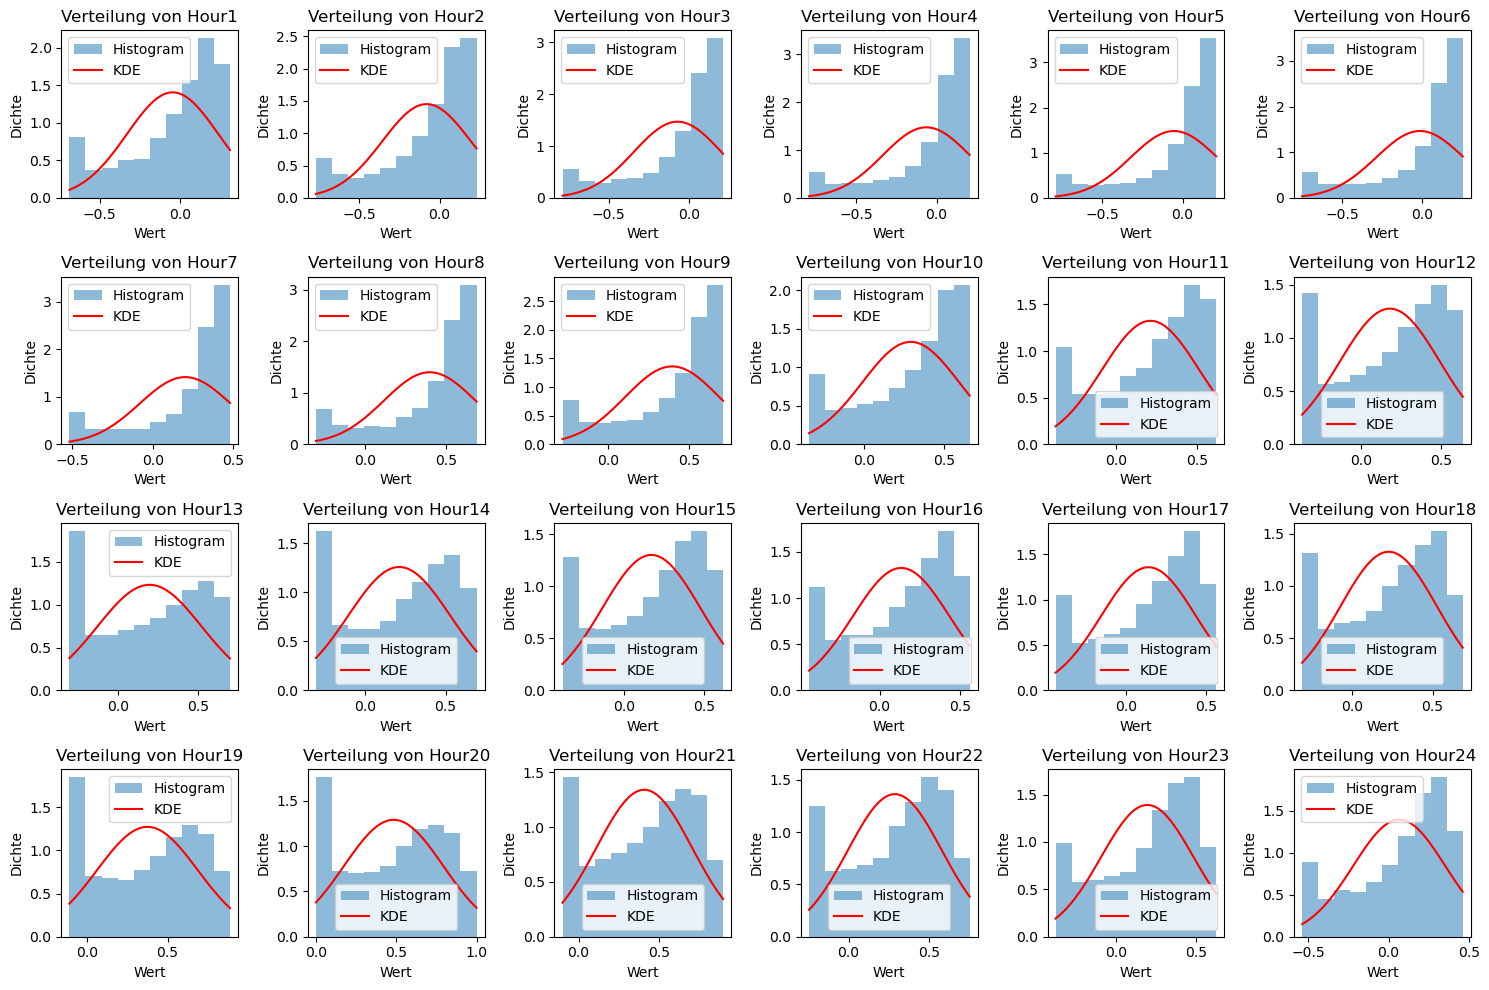

In [21]:
#Normalverteilungsapproximation
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from openpyxl import load_workbook

# Pfad zur Excel-Tabelle
path = r'C:\Users\Max Bernecker\IDiNA\Smart_meter_data_sort\check.xlsx'

# Namen der Spalten in der Excel-Tabelle, die du lesen möchtest
columns = ['Hour1','Hour2','Hour3','Hour4','Hour5','Hour6','Hour7','Hour8','Hour9',
           'Hour10','Hour11','Hour12','Hour13','Hour14','Hour15','Hour16','Hour17',
           'Hour18','Hour19','Hour20','Hour21','Hour22','Hour23','Hour24']

# DataFrame erstellen
df = pd.read_excel(path, usecols=columns)

# Schätzung der Verteilung, Mittelwert und Standardabweichung für jede Spalte
num_cols = len(df.columns)
num_rows = (num_cols + 5) // 6
fig, axs = plt.subplots(num_rows, 6, figsize=(15, 2.5 * num_rows))

for i, col in enumerate(df.columns):
    row_idx = i // 6
    col_idx = i % 6
    
    # Schätzung der Verteilung
    kde = np.histogram(df[col], density=True)
    
    # Mittelwert und Standardabweichung
    mean = np.mean(df[col])
    std = np.std(df[col])
    
    # Ausgabe der Ergebnisse
    print('Verteilungsschätzung für Spalte {}:'.format(col))
    print('Mittelwert:', mean)
    print('Standardabweichung:', std)
    
    # Histogramm
    axs[row_idx, col_idx].hist(df[col], bins=10, density=True, alpha=0.5, label='Histogram')
    
    # KDE-Plot
    x_axis = np.linspace(df[col].min(), df[col].max(), 100)
    kde_values = norm.pdf(x_axis, loc=mean, scale=std)
    axs[row_idx, col_idx].plot(x_axis, kde_values, 'r-', label='KDE')
    
    # Ausgabe der Formel für die geschätzte Verteilung
    print('Geschätzte Verteilung: Normalverteilung mit Mittelwert {} und Standardabweichung {}'.format(mean, std))
    
    # Plot anzeigen
    axs[row_idx, col_idx].legend()
    axs[row_idx, col_idx].set_title('Verteilung von {}'.format(col))
    axs[row_idx, col_idx].set_xlabel('Wert')
    axs[row_idx, col_idx].set_ylabel('Dichte')
    
# Überflüssige Plots entfernen
for i in range(num_cols, num_rows * 6):
    fig.delaxes(axs.flatten()[i])
    
plt.tight_layout()
plt.show()


C:\Miniconda\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Verteilungsschätzung für Spalte Hour1:
Mittelwert: 0.22513874753731888
Standardabweichung: 0.1790000458423316
Geschätzte Verteilung: Beta-Verteilung mit a = 0.99266065156428, b = 2.8158157702984794, loc = 1.4701951349893603e-05, scale = 0.8820467917723969
Verteilungsschätzung für Spalte Hour2:
Mittelwert: 0.20696183842140972
Standardabweichung: 0.19808503676823608
Geschätzte Verteilung: Beta-Verteilung mit a = 1.104584864223467, b = 12.263376917541601, loc = 2.2504876318542535e-06, scale = 2.5155138375800874
Verteilungsschätzung für Spalte Hour3:
Mittelwert: 0.1984109809881714
Standardabweichung: 0.19854420799450423
Geschätzte Verteilung: Beta-Verteilung mit a = 0.4795147732487455, b = 0.8967246167122742, loc = -0.00024591214734402125, scale = 0.7888051209150533
Verteilungsschätzung für Spalte Hour4:
Mittelwert: 0.19427214395705927
Standardabweichung: 0.19877513547253126
Geschätzte Verteilung: Beta-Verteilung mit a = 0.6391403012433694, b = 1.4300111802637903, loc = 0.00010419438206216

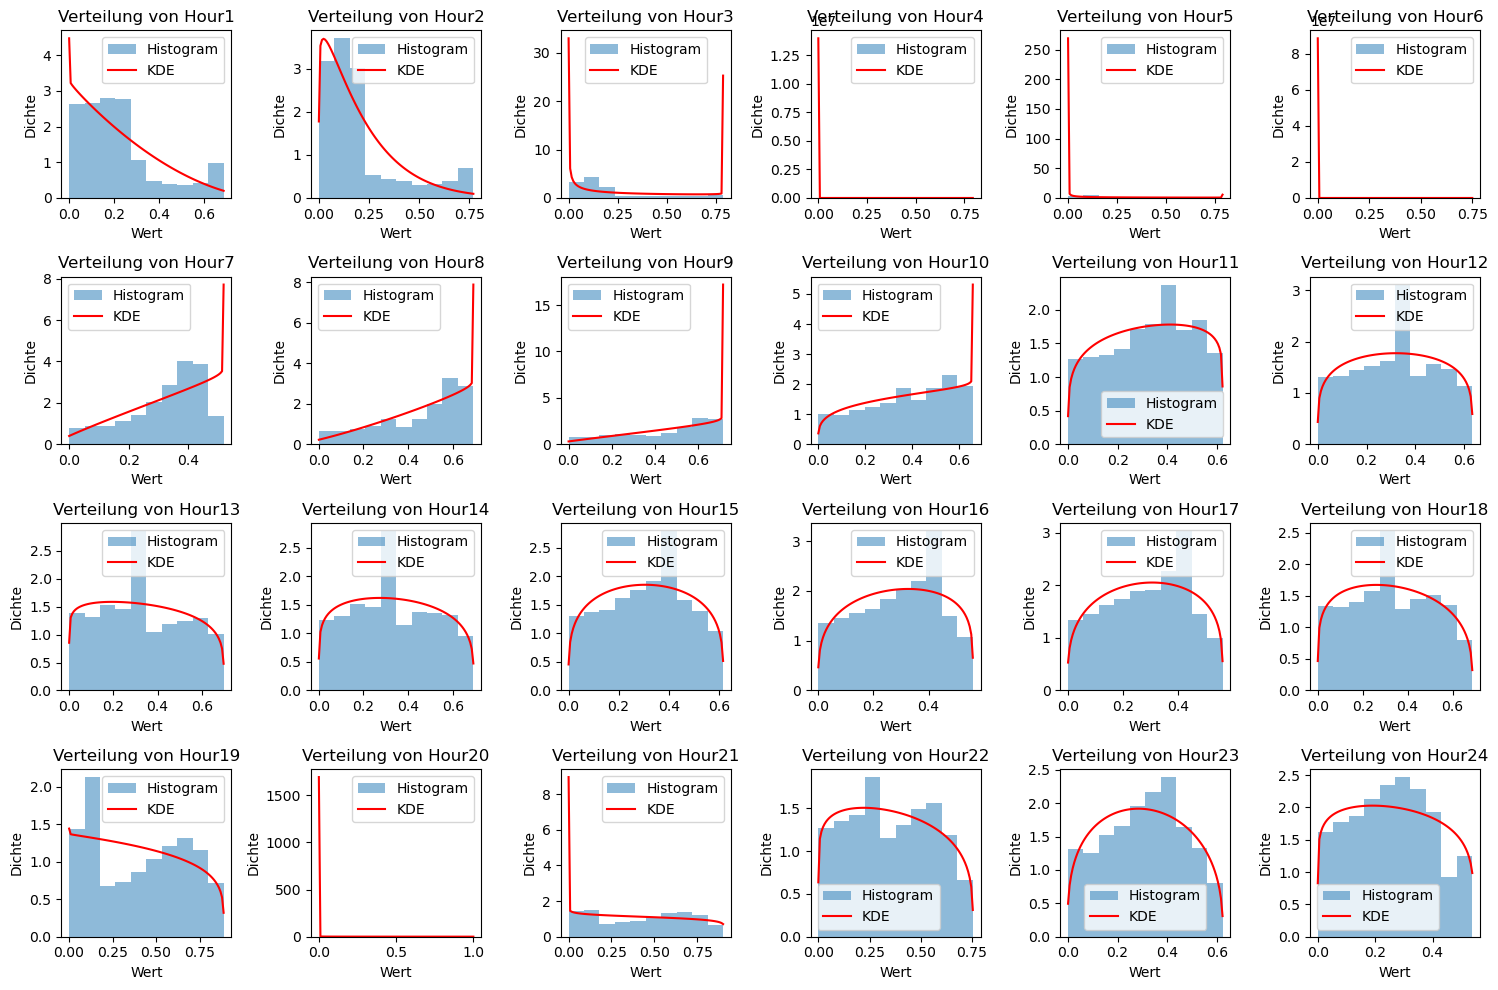

In [27]:
#Beta Verteilung

import pandas as pd
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
from openpyxl import load_workbook

# Pfad zur Excel-Tabelle
path = r'C:\Users\Max Bernecker\IDiNA\Smart_meter_data_sort\check_positive.xlsx'

# Namen der Spalten in der Excel-Tabelle, die du lesen möchtest
columns = ['Hour1','Hour2','Hour3','Hour4','Hour5','Hour6','Hour7','Hour8','Hour9',
           'Hour10','Hour11','Hour12','Hour13','Hour14','Hour15','Hour16','Hour17',
           'Hour18','Hour19','Hour20','Hour21','Hour22','Hour23','Hour24']

# DataFrame erstellen
df = pd.read_excel(path, usecols=columns)

# Schätzung der Verteilung, Mittelwert und Standardabweichung für jede Spalte
num_cols = len(df.columns)
num_rows = (num_cols + 5) // 6
fig, axs = plt.subplots(num_rows, 6, figsize=(15, 2.5 * num_rows))
for i, col in enumerate(df.columns):
    row_idx = i // 6
    col_idx = i % 6
    
    # Schätzung der Verteilung
    a, b, loc, scale = beta.fit(df[col])
    kde_values = beta.pdf(np.linspace(df[col].min(), df[col].max(), 100), a, b, loc=loc, scale=scale)
    
    # Mittelwert und Standardabweichung
    mean = df[col].mean()
    std = df[col].std()
    
    # Ausgabe der Ergebnisse
    print('Verteilungsschätzung für Spalte {}:'.format(col))
    print('Mittelwert:', mean)
    print('Standardabweichung:', std)
    
    # Histogramm
    axs[row_idx, col_idx].hist(df[col], bins=10, density=True, alpha=0.5, label='Histogram')
    
    # KDE-Plot
    x_axis = np.linspace(df[col].min(), df[col].max(), 100)
    axs[row_idx, col_idx].plot(x_axis, kde_values, 'r-', label='KDE')
    
    # Ausgabe der Formel für die geschätzte Verteilung
    print('Geschätzte Verteilung: Beta-Verteilung mit a = {}, b = {}, loc = {}, scale = {}'.format(a, b, loc, scale))
    
    # Plot anzeigen
    axs[row_idx, col_idx].legend()
    axs[row_idx, col_idx].set_title('Verteilung von {}'.format(col))
    axs[row_idx, col_idx].set_xlabel('Wert')
    axs[row_idx, col_idx].set_ylabel('Dichte')
    
# Überflüssige Plots entfernen
for i in range(num_cols, num_rows * 6):
    fig.delaxes(axs.flatten()[i])
    
plt.tight_layout()
plt.show()


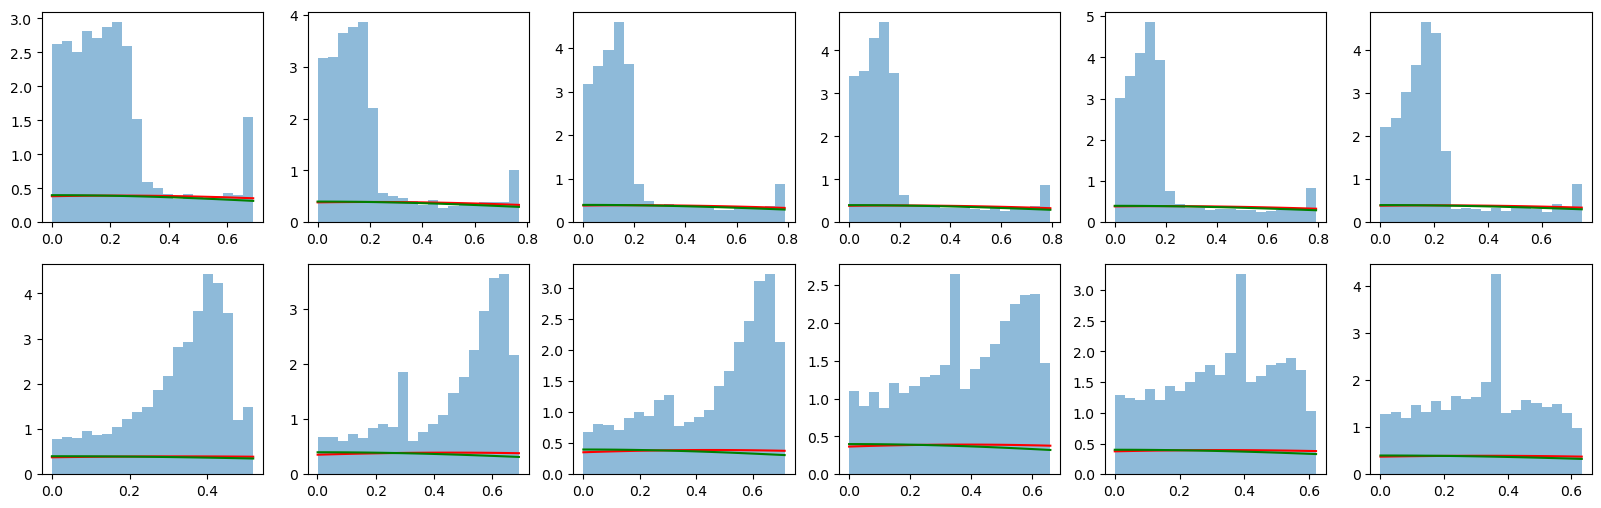

In [28]:
# Versuch beste verteilung zu finden
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, gamma, expon, lognorm
from sklearn.neighbors import KernelDensity
from openpyxl import load_workbook

# Pfad zur Excel-Tabelle
path = r'C:\Users\Max Bernecker\IDiNA\Smart_meter_data_sort\check_positive.xlsx'

# Namen der Spalten in der Excel-Tabelle, die du lesen möchtest
columns = ['Hour1','Hour2','Hour3','Hour4','Hour5','Hour6','Hour7','Hour8','Hour9',
           'Hour10','Hour11','Hour12']

# DataFrame erstellen
df = pd.read_excel(path, usecols=columns)

# Plots erstellen
num_cols = len(df.columns)
num_rows = (num_cols + 5) // 6

fig, axs = plt.subplots(num_rows, 6, figsize=(20, 3 * num_rows))

for i, col in enumerate(df.columns):
    row_idx = i // 6
    col_idx = i % 6
    
    # Schätzung der Verteilung
    X = df[col].values.reshape(-1, 1)
    kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
    kde.fit(X)
    
    # Histogramm
    axs[row_idx, col_idx].hist(X, bins=20, density=True, alpha=0.5, label='Histogram')
    
    # KDE-Plot
    x_axis = np.linspace(df[col].min(), df[col].max(), 100).reshape(-1, 1)
    kde_values = np.exp(kde.score_samples(x_axis))
    axs[row_idx, col_idx].plot(x_axis, kde_values, 'r-', label='KDE')
    
    # Best fit distribution
    distributions = [
        {'distribution': norm(), 'params': {'loc': np.mean(X), 'scale': np.std(X)}},
        {'distribution': expon(), 'params': {'scale': np.mean(X)}},
        {'distribution': gamma(a=2), 'params': {'loc': np.mean(X), 'scale': np.std(X)}},
        {'distribution': lognorm(s=1), 'params': {'loc': np.mean(X), 'scale': np.std(X)}},
        ]
    
    best_distribution = None
    best_params = {}
    best_sse = np.inf
    
    for dist in distributions:
        params = dist['params']
        dist_instance = dist['distribution']
        try:
            # fit distribution
            dist_instance = dist_instance(**params)
            log_likelihood = np.sum(dist_instance.logpdf(X))
            sse = -log_likelihood
            if best_distribution is None or sse < best_sse:
                best_distribution = dist_instance
                best_params = params
                best_sse = sse
                best_dist_name = dist_instance.dist.name
        except Exception:
            pass
    
    # check if a best distribution was found
    if best_distribution is None:
        best_distribution = norm()
        best_params = {'loc': np.mean(X), 'scale': np.std(X)}
    
    # Best fit distribution plot
    pdf_values = best_distribution.pdf(x_axis)
    dist_name = best_distribution.dist.__class__.__name__
    axs[row_idx, col_idx].plot(x_axis, pdf_values, 'g-', label=f'Best fit ({dist_name})')
    
# Show plots
plt.show()


Verteilungsschätzung für Spalte Hour1:
Mittelwert: 0.22513874753731888
Standardabweichung: 0.1789877413194889
Geschätzte Verteilung: Beta-Verteilung mit Parametern a=1.0829710631662561, b=3.6796421489274107, loc=0, scale=1
Verteilungsschätzung für Spalte Hour2:
Mittelwert: 0.20696183842140972
Standardabweichung: 0.19807142033675285
Geschätzte Verteilung: Beta-Verteilung mit Parametern a=0.8938204880800287, b=3.23771755147544, loc=0, scale=1
Verteilungsschätzung für Spalte Hour3:
Mittelwert: 0.1984109809881714
Standardabweichung: 0.1985305599994378
Geschätzte Verteilung: Beta-Verteilung mit Parametern a=0.8719831679925745, b=3.2822426539591043, loc=0, scale=1
Verteilungsschätzung für Spalte Hour4:
Mittelwert: 0.19427214395705927
Standardabweichung: 0.19876147160343297
Geschätzte Verteilung: Beta-Verteilung mit Parametern a=0.847891640671523, b=3.257962950569646, loc=0, scale=1
Verteilungsschätzung für Spalte Hour5:
Mittelwert: 0.19404244314814703
Standardabweichung: 0.19439926713730804


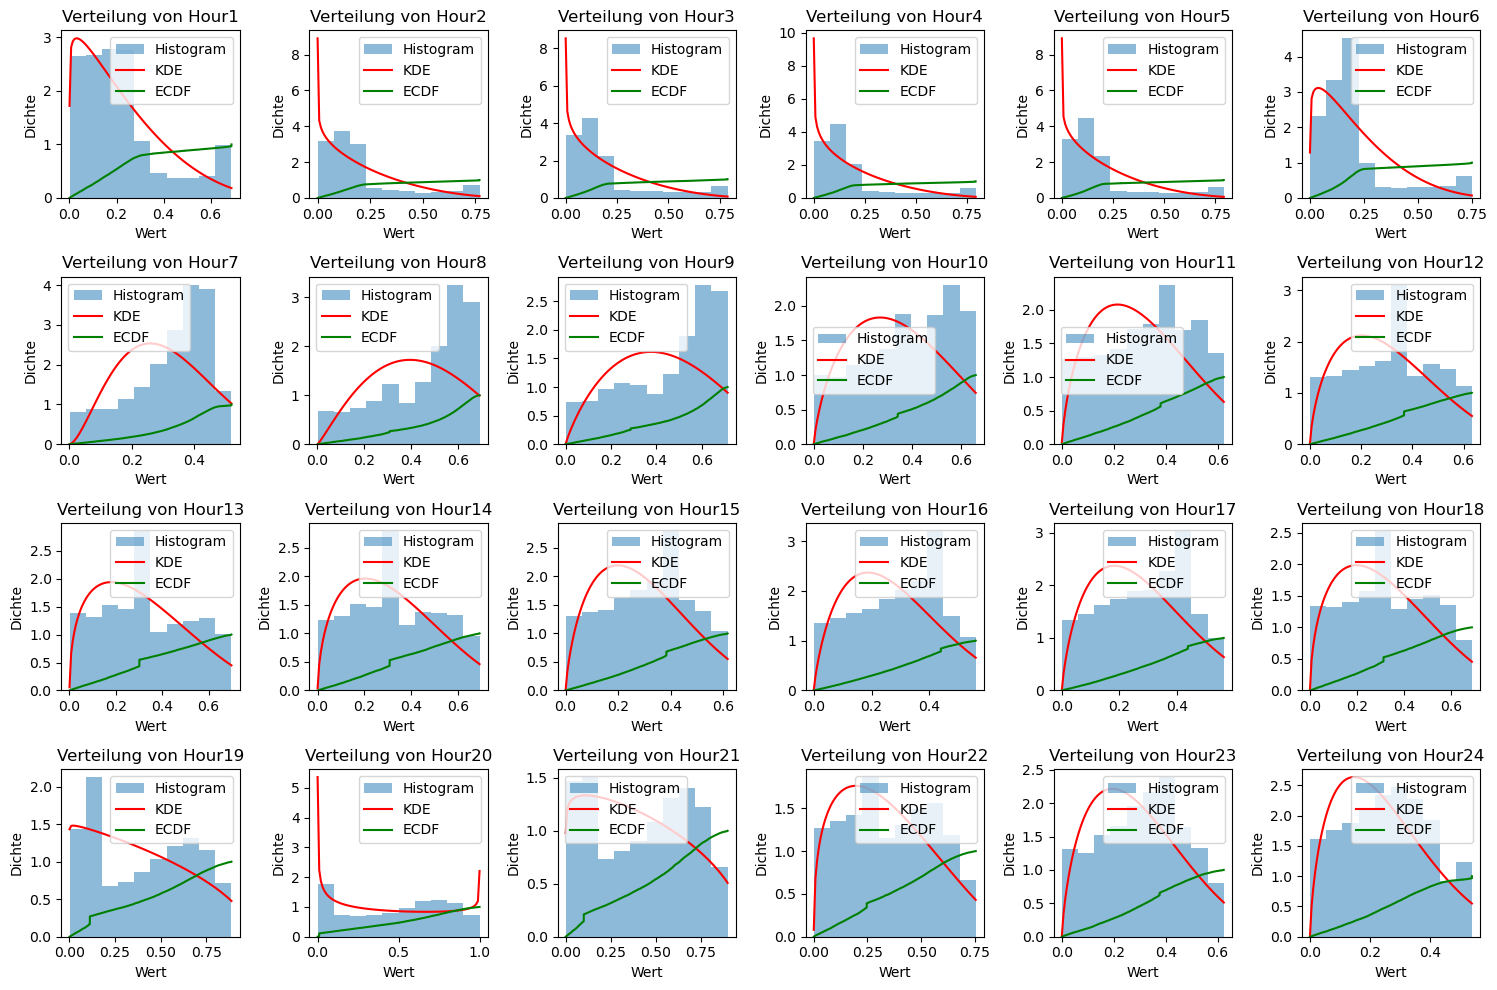

In [26]:
#Beta verteilung verbessert nur positive Werte
import pandas as pd
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

# Pfad zur Excel-Tabelle
path = r'C:\Users\Max Bernecker\IDiNA\Smart_meter_data_sort\check_positive.xlsx'

# Namen der Spalten in der Excel-Tabelle, die du lesen möchtest
columns = ['Hour1','Hour2','Hour3','Hour4','Hour5','Hour6','Hour7','Hour8','Hour9',
           'Hour10','Hour11','Hour12','Hour13','Hour14','Hour15','Hour16','Hour17',
           'Hour18','Hour19','Hour20','Hour21','Hour22','Hour23','Hour24']

# DataFrame erstellen
df = pd.read_excel(path, usecols=columns)

# Schätzung der Verteilung, Mittelwert und Standardabweichung für jede Spalte
num_cols = len(df.columns)
num_rows = (num_cols + 5) // 6
fig, axs = plt.subplots(num_rows, 6, figsize=(15, 2.5 * num_rows))

for i, col in enumerate(df.columns):
    row_idx = i // 6
    col_idx = i % 6
    
    # Schätzung der Verteilung
    params = beta.fit(df[col], floc=0, fscale=1)
    dist = beta(*params)
    
    # Mittelwert und Standardabweichung
    mean = np.mean(df[col])
    std = np.std(df[col])
    
    # Ausgabe der Ergebnisse
    print('Verteilungsschätzung für Spalte {}:'.format(col))
    print('Mittelwert:', mean)
    print('Standardabweichung:', std)
    
    # Histogramm und KDE-Plot
    axs[row_idx, col_idx].hist(df[col], bins=10, density=True, alpha=0.5, label='Histogram')
    x_axis = np.linspace(df[col].min(), df[col].max(), 100)
    axs[row_idx, col_idx].plot(x_axis, dist.pdf(x_axis), 'r-', label='KDE')
    
    # ECDF-Plot
    ecdf_x, ecdf_y = np.sort(df[col]), np.arange(1, len(df[col]) + 1) / len(df[col])
    axs[row_idx, col_idx].plot(ecdf_x, ecdf_y, 'g-', label='ECDF')
    
    # Ausgabe der Formel für die geschätzte Verteilung
    print('Geschätzte Verteilung: Beta-Verteilung mit Parametern a={}, b={}, loc=0, scale=1'.format(*params[0:2]))
    
    # Plot anzeigen
    axs[row_idx, col_idx].legend()
    axs[row_idx, col_idx].set_title('Verteilung von {}'.format(col))
    axs[row_idx, col_idx].set_xlabel('Wert')
    axs[row_idx, col_idx].set_ylabel('Dichte')
    
# Überflüssige Plots entfernen
for i in range(num_cols, num_rows * 6):
    fig.delaxes(axs.flatten()[i])
    
plt.tight_layout()
plt.show()
